In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from typing import List, Any, Union

In [286]:
# TODO: 01 -> read the output_3.csv
def read_csv_and_cast_do_dataframe(path: str = None, delimiter: str = None) -> pd.core.frame.DataFrame:
    if path == None:
        raise "path==None should be string"
    
    elif delimiter == None:
        raise "delimiter==None should be string"
    
    else:
        try:        
            __df: pd.core.frame.DataFrame = pd.read_csv(path, delimiter=delimiter)
            return __df
        except:
            raise "Error while reading the csv file. path or delimiter is incorrect"


path_csv = os.path.join('input', 'output_3.csv')
delimiter = '>'

df = read_csv_and_cast_do_dataframe(path_csv, delimiter)

def copy_dataframe(__df: pd.core.frame.DataFrame = None,\
                   __n_rows_head: int = 0) -> pd.core.frame.DataFrame:
    """
    __df : the dataframe to be copied
    __n_rows_head : number of elements of head to be copied
    """
                
    if not type(__n_rows_head) == int:
        raise  BaseException(f"__n_rows_head should be int, but {type(__n_rows_head)} was given")
    elif __n_rows_head == 0:
        try:
            print('df copy')
            return __df.copy()
        except:
            raise f"__df should be pd.core.frame.DataFrame, but {type(__df)} was given"
    else:
        try:
            print('df head copy()')
            return __df.head(__n_rows_head).copy()
        except:
            raise f"__df should be pd.core.frame.DataFrame, but {type(__df)} was given"
        
df_head = copy_dataframe(df, 5)
df_head

df head copy()


,gene,variant,population,alelle,frequency,count
0,ENSG00000159189,rs200206736,ESP6500:AA,G,1.000000,4378
1,ENSG00000159189,rs200206736,ESP6500:AA,A,0.000000,0
2,ENSG00000159189,rs200206736,ESP6500:EA,G,0.999900,8545
3,ENSG00000159189,rs200206736,ESP6500:EA,A,0.000117,1
4,ENSG00000159189,rs200206736,gnomADe:ALL,G,0.999872,195679


In [3]:
# TODO: 02 -> heatmap 01 -> select columns from heatmap 01

# way 01
# df_head.iloc[:,0:3]

# way 02
def select_columns_from_dataframe(__df: pd.core.frame.DataFrame,\
                           __li_columns: List[Union[str, int]]):

    try:
        return __df[__li_columns]
    except:
        raise "Error while select __df[li_columns]. Some columns maybe don't exist in dataframe"

def set_dataframe_index_from_inner_column(__df: pd.core.frame.DataFrame,\
                       index: Union[str, List[Union[str, int]], tuple, pd.core.series.Series] = None): 
    try:
        return __df.set_index(index)
    except:
        raise "index is not present dataframe columns"

li_columns_hmp_1 = ['gene', 'variant', 'population']
df_hmp1_columns_selected = select_columns_from_dataframe(df, li_columns_hmp_1)
df_hmp1_columns_selected

index_column_hmp_1 = 'gene'
df_hmp1_indexed_gene = set_dataframe_index_from_inner_column(df_hmp1_columns_selected, index_column_hmp_1)
df_hmp1_indexed_gene
#type(df_head.iloc[:,0:3]), df_head.iloc[:,0:3, ])

,variant,population
gene,,
ENSG00000159189,rs200206736,ESP6500:AA
ENSG00000159189,rs200206736,ESP6500:AA
ENSG00000159189,rs200206736,ESP6500:EA
ENSG00000159189,rs200206736,ESP6500:EA
ENSG00000159189,rs200206736,gnomADe:ALL
...,...,...
ENSG00000136689,rs121913162,ALFA:SAMN10492704
ENSG00000136689,rs121913162,ALFA:SAMN10492705
ENSG00000136689,rs121913162,ALFA:SAMN10492705


In [4]:
# TODO: 03 -> heatmap 01 -> count variants per gene
# df.count()
# df_head.count(axis='columns')
# df.value_counts().to_dict()
# df_head['gene']
# df_head.columns

def select_specif_values_of_a_dataframe_column(__df: pd.core.frame.DataFrame = None,\
                                               __column: str = None,\
                                               __value: Any = None) -> pd.core.frame.DataFrame:
    
    bol = __df[__column] == __value
    return __df[bol]

df_hmp1_indexed_gene_amr = select_specif_values_of_a_dataframe_column(df_hmp1_indexed_gene,\
                                                                     'population',\
                                                                     'gnomADe:amr')
# bol = df_head['count'] > 0
# df_head[bol].value_counts()

print(len(df_hmp1_indexed_gene_amr.loc[['ENSG00000159189'], ['population']]))

def calc_n_values_per_index_in_a_specifc_column(__df: pd.core.frame.DataFrame = None) -> pd.core.frame.DataFrame:
    for __index in __df.index.unique():
        __n_values_per_index = len(__df.loc[[__index],])
        return __n_values_per_index
#         break

for gene in df_hmp1_indexed_gene_amr.index.unique():
    n_variants_per_gene_in_amr_population = len(df_hmp1_indexed_gene_amr.loc[[gene], ['population']])
    print(n_variants_per_gene_in_amr_population)
    break

n = calc_n_values_per_index_in_a_specifc_column(df_hmp1_indexed_gene_amr)
print(n)

df_hmp1_indexed_gene_amr.loc[['ENSG00000159189'], ]

# count number of variants per gene from a amr population dataframe
def calc_n_values_per_index_in_a_specifc_column_from_an_unique_another_column(__df_indexed: pd.core.frame.DataFrame = None,\
                                                                              __index: str = None,\
                                                                             __column: str = None):
    return len(__df_indexed.loc[[__index] ,__column].unique())

n = calc_n_values_per_index_in_a_specifc_column_from_an_unique_another_column(df_hmp1_indexed_gene_amr,\
                                                                         'ENSG00000159189',
                                                                         'variant')
n

30
30
30


4

In [5]:
# continuing
column: str = 'population'
column_2: str = 'variant'
    
li_values_column_population: List[str] = ['gnomADe:amr']

for value in li_values_column_population:
    df_hmp1_indexed_index_column = select_specif_values_of_a_dataframe_column(df_hmp1_indexed_gene,\
                                                                     column,\
                                                                     value)
    
    n_alelles_per_gene = calc_n_values_per_index_in_a_specifc_column(df_hmp1_indexed_index_column)
    print(n_alelles_per_gene)
    
    for index, row in df.iterrows():
        print(index)
        break
    
    n_variants_per_gene = calc_n_values_per_index_in_a_specifc_column_from_an_unique_another_column(df_hmp1_indexed_gene_amr,\
                                                                         'ENSG00000159189',
                                                                         column_2)
    print(n_variants_per_gene)
    

30
0
4


In [6]:
# continuing
# df_hmp1_indexed_gene.describe()
# df_hmp1_indexed_gene.describe()
outside = df['gene']
inside = df['variant']
tuple_hier_index = list(zip(outside, inside))
# print(tuple_hier_index)
hier_index = pd.MultiIndex.from_tuples(tuple_hier_index)
hier_index

MultiIndex([('ENSG00000159189', 'rs200206736'),
            ('ENSG00000159189', 'rs200206736'),
            ('ENSG00000159189', 'rs200206736'),
            ('ENSG00000159189', 'rs200206736'),
            ('ENSG00000159189', 'rs200206736'),
            ('ENSG00000159189', 'rs200206736'),
            ('ENSG00000159189', 'rs200206736'),
            ('ENSG00000159189', 'rs200206736'),
            ('ENSG00000159189', 'rs200206736'),
            ('ENSG00000159189', 'rs200206736'),
            ...
            ('ENSG00000136689', 'rs121913162'),
            ('ENSG00000136689', 'rs121913162'),
            ('ENSG00000136689', 'rs121913162'),
            ('ENSG00000136689', 'rs121913162'),
            ('ENSG00000136689', 'rs121913162'),
            ('ENSG00000136689', 'rs121913162'),
            ('ENSG00000136689', 'rs121913162'),
            ('ENSG00000136689', 'rs121913162'),
            ('ENSG00000136689', 'rs121913162'),
            ('ENSG00000136689', 'rs121913162')],
           length=11255

In [7]:
df_gene_variant_indexed = pd.DataFrame(df, index=hier_index, columns=df.columns)
df_gene_variant_indexed
# df

gene variant population alelle  frequency  count
ENSG00000159189 rs200206736  NaN     NaN        NaN    NaN        NaN    NaN
                rs200206736  NaN     NaN        NaN    NaN        NaN    NaN
                rs200206736  NaN     NaN        NaN    NaN        NaN    NaN
                rs200206736  NaN     NaN        NaN    NaN        NaN    NaN
                rs200206736  NaN     NaN        NaN    NaN        NaN    NaN
...                          ...     ...        ...    ...        ...    ...
ENSG00000136689 rs121913162  NaN     NaN        NaN    NaN        NaN    NaN
                rs121913162  NaN     NaN        NaN    NaN        NaN    NaN
                rs121913162  NaN     NaN        NaN    NaN        NaN    NaN
                rs121913162  NaN     NaN        NaN    NaN        NaN    NaN
                rs121913162  NaN     NaN        NaN    NaN        NaN    NaN

[1125530 rows x 6 columns]

In [8]:
df_gene_variant_indexed.loc['ENSG00000159189']

,gene,variant,population,alelle,frequency,count
rs200206736,NaN,NaN,NaN,NaN,NaN,NaN
rs200206736,NaN,NaN,NaN,NaN,NaN,NaN
rs200206736,NaN,NaN,NaN,NaN,NaN,NaN
rs200206736,NaN,NaN,NaN,NaN,NaN,NaN
rs200206736,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
rs752596663,NaN,NaN,NaN,NaN,NaN,NaN
rs752596663,NaN,NaN,NaN,NaN,NaN,NaN
rs752596663,NaN,NaN,NaN,NaN,NaN,NaN
rs752596663,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# continuing: THE BEST WAY OF SEPARATING INDEXS
df_gen_var_pop_ale_indexed = df.set_index(['gene', 'variant', 'population', 'alelle'])
df_gen_var_pop_ale_indexed

frequency   count
gene            variant     population        alelle                   
ENSG00000159189 rs200206736 ESP6500:AA        G        1.000000    4378
                                              A        0.000000       0
                            ESP6500:EA        G        0.999900    8545
                                              A        0.000117       1
                            gnomADe:ALL       G        0.999872  195679
...                                                         ...     ...
ENSG00000136689 rs121913162 ALFA:SAMN10492704 T        0.000000       0
                            ALFA:SAMN10492705 C        1.000000     182
                                              T        0.000000       0
                            ALFA:SAMN11605645 C        1.000000      56
                                              T        0.000000       0

[1125530 rows x 2 columns]

In [10]:
# it insn't necessary
df_gen_var_pop_ale_indexed.index.names = ['gene', 'variant', 'population', 'alelle']
df_gen_var_pop_ale_indexed

frequency   count
gene            variant     population        alelle                   
ENSG00000159189 rs200206736 ESP6500:AA        G        1.000000    4378
                                              A        0.000000       0
                            ESP6500:EA        G        0.999900    8545
                                              A        0.000117       1
                            gnomADe:ALL       G        0.999872  195679
...                                                         ...     ...
ENSG00000136689 rs121913162 ALFA:SAMN10492704 T        0.000000       0
                            ALFA:SAMN10492705 C        1.000000     182
                                              T        0.000000       0
                            ALFA:SAMN11605645 C        1.000000      56
                                              T        0.000000       0

[1125530 rows x 2 columns]

In [11]:
df_gen_var_pop_ale_indexed.loc['ENSG00000159189']

frequency   count
variant     population  alelle                   
rs200206736 ESP6500:AA  G        1.000000    4378
                        A        0.000000       0
            ESP6500:EA  G        0.999900    8545
                        A        0.000117       1
            gnomADe:ALL G        0.999872  195679
...                                   ...     ...
rs752596663 gnomADg:nfe A        0.000077       5
            gnomADg:oth G        1.000000    2146
                        A        0.000000       0
            gnomADg:sas G        1.000000    3044
                        A        0.000000       0

[702 rows x 2 columns]

In [12]:
# cross section
df_gen_var_pop_ale_indexed.xs('ENSG00000159189').xs('rs200206736')

frequency   count
population  alelle                   
ESP6500:AA  G        1.000000    4378
            A        0.000000       0
ESP6500:EA  G        0.999900    8545
            A        0.000117       1
gnomADe:ALL G        0.999872  195679
...                       ...     ...
gnomADg:nfe A        0.000093       6
gnomADg:oth G        1.000000    2154
            A        0.000000       0
gnomADg:sas G        1.000000    3044
            A        0.000000       0

[126 rows x 2 columns]

In [13]:
# cross section
df_gen_var_pop_ale_indexed.xs('rs200206736', level='variant')

frequency   count
gene            population  alelle                   
ENSG00000159189 ESP6500:AA  G        1.000000    4378
                            A        0.000000       0
                ESP6500:EA  G        0.999900    8545
                            A        0.000117       1
                gnomADe:ALL G        0.999872  195679
...                                       ...     ...
                gnomADg:nfe A        0.000093       6
                gnomADg:oth G        1.000000    2154
                            A        0.000000       0
                gnomADg:sas G        1.000000    3044
                            A        0.000000       0

[126 rows x 2 columns]

<AxesSubplot:ylabel='gene-variant-population-alelle'>

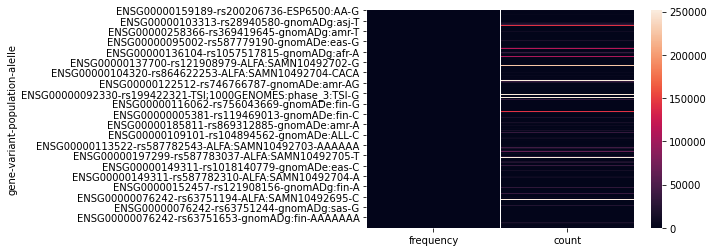

In [14]:
sns.heatmap(df_gen_var_pop_ale_indexed)

<AxesSubplot:ylabel='variant-population-alelle'>

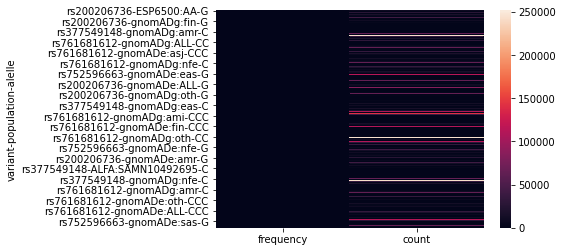

In [15]:
sns.heatmap(df_gen_var_pop_ale_indexed.loc['ENSG00000159189'])

In [16]:
# group by

# 01: by variant
# 02: by gene
# 03: by population

group_gene = df_gen_var_pop_ale_indexed.groupby('gene')
df_gene_variant_per_alelle = select_columns_from_dataframe(df, ['gene', 'variant'])
df_gene_variant_per_alelle

,gene,variant
0,ENSG00000159189,rs200206736
1,ENSG00000159189,rs200206736
2,ENSG00000159189,rs200206736
3,ENSG00000159189,rs200206736
4,ENSG00000159189,rs200206736
...,...,...
1125525,ENSG00000136689,rs121913162
1125526,ENSG00000136689,rs121913162
1125527,ENSG00000136689,rs121913162
1125528,ENSG00000136689,rs121913162


In [17]:
# drop duplicates
df_gene_variant_uniques = df_gene_variant_per_alelle.drop_duplicates(subset ="variant", 
                     keep = 'first', inplace = False)


df_test = df.drop_duplicates(subset="gene", keep="first", inplace=False)
df_genes_non_duplicates = df.drop_duplicates(subset="gene", keep="first", inplace=False)['gene']
df_genes_non_duplicates

0          ENSG00000159189
702        ENSG00000128322
1041       ENSG00000010671
1889       ENSG00000125826
2957       ENSG00000003400
                ...       
1121604    ENSG00000072274
1121856    ENSG00000187736
1123394    ENSG00000183918
1124066    ENSG00000135899
1125208    ENSG00000136689
Name: gene, Length: 236, dtype: object

In [18]:
# checking if the dataset is correct in number of genes -> OK
df2 = pd.read_csv('input/output_2.csv', delimiter='>')
print(len(df['gene'].unique()))
print(len(pd.read_csv('input/output_2.csv', delimiter='>')['gene'].unique()))

print(len(df2['gene'].unique()))
print(len(df2.drop_duplicates(subset="gene", keep="first", inplace=False)['variant'].unique()))

236
236
236
236


In [24]:
# group by (CONTINUATION)
# df: count the alelles per variant of each gene
df_gen_var = df[['gene', 'variant']]
group_gen = df_gen_var.groupby('gene')
group_gen.sum()

,variant
gene,
ENSG00000000971,rs387906550rs387906550rs387906550rs387906550rs...
ENSG00000003400,rs121909776rs121909776rs121909776rs121909776rs...
ENSG00000004455,rs267606645rs267606645rs267606645rs267606645rs...
ENSG00000005381,rs35897051rs35897051rs35897051rs35897051rs3589...
ENSG00000007312,rs121912424rs121912424rs121912424rs121912424rs...
...,...
ENSG00000264229,rs370715569rs370715569rs370715569rs370715569rs...
ENSG00000269335,rs782604431rs782604431rs782604431rs782604431rs...
ENSG00000270141,rs1553915517rs1553915517rs1553915517rs15539155...


In [28]:
# group by (CONTINUATION)
# df2: count variants per gene
df2_gen_var = df2[['gene', 'variant']]
group2_gen = df2_gen_var.groupby('gene')
group2_gen.sum()

,variant
gene,
ENSG00000000971,rs387906550rs387906550rs387906550rs387906550rs...
ENSG00000003400,rs121909776rs121909776rs121909776rs121909776rs...
ENSG00000004455,rs267606645rs267606645rs267606645rs267606645rs...
ENSG00000005381,rs35897051rs35897051rs35897051rs35897051rs3589...
ENSG00000007312,rs121912424rs121912424rs121912424rs121912424rs...
...,...
ENSG00000264229,rs370715569rs370715569rs370715569rs370715569rs...
ENSG00000269335,rs782604431rs782604431rs782604431rs782604431rs...
ENSG00000270141,rs1553915517rs1553915517rs1553915517rs15539155...


In [52]:
# groupby part 2
# df2
print('count the variants per gene')

# group2_gen.describe()
n = 100
print(df2.head(n))
df2.head(n)[['gene', 'variant']].groupby('gene').describe()

count the variants per gene
               gene      variant     population  \
0   ENSG00000159189  rs200206736     ESP6500:AA   
1   ENSG00000159189  rs200206736     ESP6500:EA   
2   ENSG00000159189  rs200206736    gnomADe:ALL   
3   ENSG00000159189  rs200206736    gnomADe:afr   
4   ENSG00000159189  rs200206736    gnomADe:amr   
..              ...          ...            ...   
95  ENSG00000159189  rs752596663    gnomADe:oth   
96  ENSG00000159189  rs752596663    gnomADe:sas   
97  ENSG00000159189  rs752596663    gnomADg:ALL   
98  ENSG00000159189  rs752596663    gnomADg:afr   
99  ENSG00000159189  rs752596663    gnomADg:ami   

                                       frequency  
0                      G: 1.000 (4378) A: 0.000   
1              G: 0.9999 (8545) A: 0.000117 (1)   
2   G: 0.999872256 (195679) A: 0.000127744 (25)   
3                     G: 1.000 (11752) A: 0.000   
4                     G: 1.000 (27378) A: 0.000   
..                                           ...  
95

variant                         
                  count unique          top freq
gene                                            
ENSG00000159189     100      4  rs761681612   38

In [53]:
# groupby part 2
# df
print('count the alelles per gene')

# group_gen.describe()
n = 40
print(df.head(n))
df.head(n)[['gene', 'variant']].groupby('gene').describe()

count the alelles per gene
               gene      variant   population alelle  frequency   count
0   ENSG00000159189  rs200206736   ESP6500:AA      G   1.000000    4378
1   ENSG00000159189  rs200206736   ESP6500:AA      A   0.000000       0
2   ENSG00000159189  rs200206736   ESP6500:EA      G   0.999900    8545
3   ENSG00000159189  rs200206736   ESP6500:EA      A   0.000117       1
4   ENSG00000159189  rs200206736  gnomADe:ALL      G   0.999872  195679
5   ENSG00000159189  rs200206736  gnomADe:ALL      A   0.000128      25
6   ENSG00000159189  rs200206736  gnomADe:afr      G   1.000000   11752
7   ENSG00000159189  rs200206736  gnomADe:afr      A   0.000000       0
8   ENSG00000159189  rs200206736  gnomADe:amr      G   1.000000   27378
9   ENSG00000159189  rs200206736  gnomADe:amr      A   0.000000       0
10  ENSG00000159189  rs200206736  gnomADe:asj      G   0.999887    8877
11  ENSG00000159189  rs200206736  gnomADe:asj      A   0.000113       1
12  ENSG00000159189  rs200206736  gno

variant                         
                  count unique          top freq
gene                                            
ENSG00000159189      40      1  rs200206736   40

In [56]:
# woring on df_indexed
df_gen_var_pop_ale_indexed[[]]

Empty DataFrame
Columns: []
Index: [(ENSG00000159189, rs200206736, ESP6500:AA, G), (ENSG00000159189, rs200206736, ESP6500:AA, A), (ENSG00000159189, rs200206736, ESP6500:EA, G), (ENSG00000159189, rs200206736, ESP6500:EA, A), (ENSG00000159189, rs200206736, gnomADe:ALL, G), (ENSG00000159189, rs200206736, gnomADe:ALL, A), (ENSG00000159189, rs200206736, gnomADe:afr, G), (ENSG00000159189, rs200206736, gnomADe:afr, A), (ENSG00000159189, rs200206736, gnomADe:amr, G), (ENSG00000159189, rs200206736, gnomADe:amr, A), (ENSG00000159189, rs200206736, gnomADe:asj, G), (ENSG00000159189, rs200206736, gnomADe:asj, A), (ENSG00000159189, rs200206736, gnomADe:eas, G), (ENSG00000159189, rs200206736, gnomADe:eas, A), (ENSG00000159189, rs200206736, gnomADe:fin, G), (ENSG00000159189, rs200206736, gnomADe:fin, A), (ENSG00000159189, rs200206736, gnomADe:nfe, G), (ENSG00000159189, rs200206736, gnomADe:nfe, A), (ENSG00000159189, rs200206736, gnomADe:oth, G), (ENSG00000159189, rs200206736, gnomADe:oth, A), (ENSG00000159189, rs200206736, gnomADe:sas, G), (ENSG00000159189, rs200206736, gnomADe:sas, A), (ENSG00000159189, rs200206736, gnomADg:ALL, G), (ENSG00000159189, rs200206736, gnomADg:ALL, A), (ENSG00000159189, rs200206736, gnomADg:afr, G), (ENSG00000159189, rs200206736, gnomADg:afr, A), (ENSG00000159189, rs200206736, gnomADg:ami, G), (ENSG00000159189, rs200206736, gnomADg:ami, A), (ENSG00000159189, rs200206736, gnomADg:amr, G), (ENSG00000159189, rs200206736, gnomADg:amr, A), (ENSG00000159189, rs200206736, gnomADg:asj, G), (ENSG00000159189, rs200206736, gnomADg:asj, A), (ENSG00000159189, rs200206736, gnomADg:eas, G), (ENSG00000159189, rs200206736, gnomADg:eas, A), (ENSG00000159189, rs200206736, gnomADg:fin, G), (ENSG00000159189, rs200206736, gnomADg:fin, A), (ENSG00000159189, rs200206736, gnomADg:nfe, G), (ENSG00000159189, rs200206736, gnomADg:nfe, A), (ENSG00000159189, rs200206736, gnomADg:oth, G), (ENSG00000159189, rs200206736, gnomADg:oth, A), (ENSG00000159189, rs200206736, gnomADg:sas, G), (ENSG00000159189, rs200206736, gnomADg:sas, A), (ENSG00000159189, rs377549148, ALFA:SAMN10492695, C), (ENSG00000159189, rs377549148, ALFA:SAMN10492695, T), (ENSG00000159189, rs377549148, ALFA:SAMN10492696, C), (ENSG00000159189, rs377549148, ALFA:SAMN10492696, T), (ENSG00000159189, rs377549148, ALFA:SAMN10492697, C), (ENSG00000159189, rs377549148, ALFA:SAMN10492697, T), (ENSG00000159189, rs377549148, ALFA:SAMN10492698, C), (ENSG00000159189, rs377549148, ALFA:SAMN10492698, T), (ENSG00000159189, rs377549148, ALFA:SAMN10492701, C), (ENSG00000159189, rs377549148, ALFA:SAMN10492701, T), (ENSG00000159189, rs377549148, ALFA:SAMN10492702, C), (ENSG00000159189, rs377549148, ALFA:SAMN10492702, T), (ENSG00000159189, rs377549148, ALFA:SAMN10492703, C), (ENSG00000159189, rs377549148, ALFA:SAMN10492703, T), (ENSG00000159189, rs377549148, ALFA:SAMN10492704, C), (ENSG00000159189, rs377549148, ALFA:SAMN10492704, T), (ENSG00000159189, rs377549148, ALFA:SAMN10492705, C), (ENSG00000159189, rs377549148, ALFA:SAMN10492705, T), (ENSG00000159189, rs377549148, ALFA:SAMN11605645, C), (ENSG00000159189, rs377549148, ALFA:SAMN11605645, T), (ENSG00000159189, rs377549148, gnomADg:ALL, C), (ENSG00000159189, rs377549148, gnomADg:ALL, T), (ENSG00000159189, rs377549148, gnomADg:afr, C), (ENSG00000159189, rs377549148, gnomADg:afr, T), (ENSG00000159189, rs377549148, gnomADg:ami, C), (ENSG00000159189, rs377549148, gnomADg:ami, T), (ENSG00000159189, rs377549148, gnomADg:amr, C), (ENSG00000159189, rs377549148, gnomADg:amr, T), (ENSG00000159189, rs377549148, gnomADg:asj, C), (ENSG00000159189, rs377549148, gnomADg:asj, T), (ENSG00000159189, rs377549148, gnomADg:eas, C), (ENSG00000159189, rs377549148, gnomADg:eas, T), (ENSG00000159189, rs377549148, gnomADg:fin, C), (ENSG00000159189, rs377549148, gnomADg:fin, T), (ENSG00000159189, rs377549148, gnomADg:nfe, C), (ENSG00000159189, rs377549148, gnomADg:nfe, T), (ENSG00000159189, rs377549148, gnomADg:oth, C), (ENSG00000159189, rs377549148, gnomADg:oth, T), (ENSG000

In [89]:
# working on df_indexed
print('count frequency of gene for each alelle\n')
print('\tcount -> count the number of rows')
print('\tmean -> mean of alelle frequencies. it includes G and A in the calc')
print('\tstd -> std of alelle frequencies. it includes G and A in the calc')
print()
n = 5
print(df_gen_var_pop_ale_indexed['frequency'].head(n))
g = df_gen_var_pop_ale_indexed['frequency'].head(n).groupby('gene')
g.describe()

count frequency of gene for each alelle

	count -> count the number of rows
	mean -> mean of alelle frequencies. it includes G and A in the calc
	std -> std of alelle frequencies. it includes G and A in the calc

gene             variant      population   alelle
ENSG00000159189  rs200206736  ESP6500:AA   G         1.000000
                                           A         0.000000
                              ESP6500:EA   G         0.999900
                                           A         0.000117
                              gnomADe:ALL  G         0.999872
Name: frequency, dtype: float64


,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ENSG00000159189,5.0,0.599978,0.547649,0.0,0.000117,0.999872,0.9999,1.0


In [94]:
# working on df_indexed
print('count  count of gene for each alelle\n')
print('\tcount -> count the number of rows')
print('\tmean -> mean of alelle count. it includes G and A in the calc')
print('\tstd -> std of alelle count. it includes G and A in the calc')
print()
n = 5
print(df_gen_var_pop_ale_indexed['count'].head(n))
g = df_gen_var_pop_ale_indexed['count'].head(n).groupby('gene')
g.describe()

count  count of gene for each alelle

	count -> count the number of rows
	mean -> mean of alelle count. it includes G and A in the calc
	std -> std of alelle count. it includes G and A in the calc

gene             variant      population   alelle
ENSG00000159189  rs200206736  ESP6500:AA   G           4378
                                           A              0
                              ESP6500:EA   G           8545
                                           A              1
                              gnomADe:ALL  G         195679
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ENSG00000159189,5.0,41720.6,86138.56951,0.0,1.0,4378.0,8545.0,195679.0


In [96]:
# working on df_indexed
print('count frequency of variant for each alelle\n')
print('\tcount -> count the number of rows')
print('\tmean -> mean of alelle frequencies per variant. it includes G and A in the calc')
print('\tstd -> std of alelle frequencies per variant. it includes G and A in the calc')
print()
n = 5
print(df_gen_var_pop_ale_indexed['frequency'].head(n))
g = df_gen_var_pop_ale_indexed['frequency'].head(n).groupby('variant')
g.describe()

count frequency of variant for each alelle

	count -> count the number of rows
	mean -> mean of alelle frequencies per variant. it includes G and A in the calc
	std -> std of alelle frequencies per variant. it includes G and A in the calc

gene             variant      population   alelle
ENSG00000159189  rs200206736  ESP6500:AA   G         1.000000
                                           A         0.000000
                              ESP6500:EA   G         0.999900
                                           A         0.000117
                              gnomADe:ALL  G         0.999872
Name: frequency, dtype: float64


,count,mean,std,min,25%,50%,75%,max
variant,,,,,,,,
rs200206736,5.0,0.599978,0.547649,0.0,0.000117,0.999872,0.9999,1.0


In [99]:
# working on df_indexed
print('count count of variant for each alelle\n')
print('\tcount -> count the number of rows')
print('\tmean -> mean of alelle count per variant. it includes G and A in the calc')
print('\tstd -> std of alelle count per variant. it includes G and A in the calc')
print()
n = 5
print(df_gen_var_pop_ale_indexed['count'].head(n))
g = df_gen_var_pop_ale_indexed['count'].head(n).groupby('variant')
g.describe()

count count of variant for each alelle

	count -> count the number of rows
	mean -> mean of alelle count per variant. it includes G and A in the calc
	std -> std of alelle count per variant. it includes G and A in the calc

gene             variant      population   alelle
ENSG00000159189  rs200206736  ESP6500:AA   G           4378
                                           A              0
                              ESP6500:EA   G           8545
                                           A              1
                              gnomADe:ALL  G         195679
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
variant,,,,,,,,
rs200206736,5.0,41720.6,86138.56951,0.0,1.0,4378.0,8545.0,195679.0


In [323]:
# comming back to hmp 01 -> N VARIANTS PER GENE OK
# df2_genes = df2.head(40)['gene'].unique()
# print(df2_genes)
# for gene in df2_genes:
#     df2_variants = df2[['gene', 'variant']].head(40).[[gene, 'variant']]
#     for variant in df2_variants:
#         print(gene, variant)

# print(df2_indexed.xs('gene'))
    
# for variant in df2[['gene', 'variant', 'population']].head(40)['variant'].unique(): pass

# IMPORANT: ITERATING PVER GENES AND FILTERING DF BY GENE PER ITERATION
# INSIDE GENE LOOP, WE CAN ITERATE OVER VARIANTS
# INSIDE VARIANT LOOP, WE CAN ITERATE OVER POPULATIONS

df2_gene_frequency_indexed = df2.set_index(['gene', 'frequency'])
df2_gene_variant_indexed = df2.set_index(['gene', 'variant'])

# n variants per gene
print(len(df2['gene'].unique()))
di_out = {}
for gene in df2['gene'].unique():    
    di_out[gene] = 0
    df2_gene = df2_gene_frequency_indexed.xs(gene, level='gene')
    
    # doesn't use .unique() here, because a variant can be pointed to more then one gene
    for variant in df2_gene['variant'].unique():
#         print(gene, variant)
        di_out[gene] += 1
        # df2_gene_variant = df2_gene_variant_indexed.xs(gene, level='gene').xs(variant, level='variant')
        # for population in df2_gene_variant_indexed['population'].unique():
            # print(gene, variant, population)
#     break

di_out

236


{'ENSG00000159189': 4,
 'ENSG00000128322': 2,
 'ENSG00000010671': 4,
 'ENSG00000125826': 4,
 'ENSG00000003400': 3,
 'ENSG00000081237': 2,
 'ENSG00000174405': 15,
 'ENSG00000140694': 9,
 'ENSG00000160710': 8,
 'ENSG00000198851': 3,
 'ENSG00000143365': 1,
 'ENSG00000103313': 22,
 'ENSG00000171135': 5,
 'ENSG00000115415': 3,
 'ENSG00000181163': 1,
 'ENSG00000187796': 5,
 'ENSG00000085063': 1,
 'ENSG00000185339': 6,
 'ENSG00000130826': 4,
 'ENSG00000270141': 7,
 'ENSG00000026103': 2,
 'ENSG00000103005': 10,
 'ENSG00000149131': 4,
 'ENSG00000112936': 4,
 'ENSG00000144354': 3,
 'ENSG00000187608': 1,
 'ENSG00000136631': 1,
 'ENSG00000110719': 24,
 'ENSG00000105329': 7,
 'ENSG00000138684': 1,
 'ENSG00000180644': 20,
 'ENSG00000107201': 1,
 'ENSG00000096996': 7,
 'ENSG00000171793': 1,
 'ENSG00000258366': 29,
 'ENSG00000132549': 111,
 'ENSG00000027697': 5,
 'ENSG00000102575': 7,
 'ENSG00000198805': 8,
 'ENSG00000166278': 2,
 'ENSG00000115267': 6,
 'ENSG00000198223': 1,
 'ENSG00000143390': 1,
 'E

In [317]:
# isso aqui é muito bom

df2_indexed.xs('ENSG00000159189').describe()

,variant,population
count,321,321
unique,4,31
top,rs761681612,gnomADg:nfe
freq,114,15


                   0
ENSG00000149311  295
ENSG00000116062  142
ENSG00000132549  111
ENSG00000076242   91
ENSG00000122512   91
ENSG00000113522   90
ENSG00000095002   89
ENSG00000197299   63
ENSG00000104320   60
ENSG00000096696   59
ENSG00000171862   55
ENSG00000166349   44
ENSG00000171316   39
ENSG00000196839   37
ENSG00000160224   36
ENSG00000175097   36
ENSG00000137700   30
ENSG00000258366   29
ENSG00000110921   27
ENSG00000110719   24
                0
count  236.000000
mean    10.944915
std     26.061652
min      1.000000
25%      2.000000
50%      4.000000
75%      8.250000
max    295.000000
<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, ENSG00000159189 to ENSG00000136689
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       236 non-null    int64
dtypes: int64(1)
memory usage: 3.7+ KB
None


<AxesSubplot:>

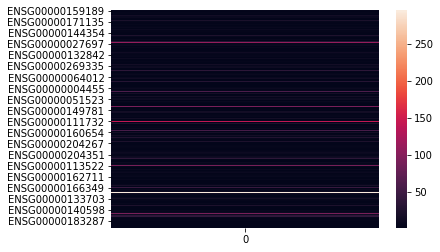

In [327]:
# heatmap 01: di_out to dataframe
# n variants per gene
df_out = pd.DataFrame.from_dict(data=di_out, orient='index')
df_out_sorted = df_out.sort_values(by=[0], ascending=False)
print(df_out_sorted.head(20))

print(df_out.describe())
print(df_out.info())

sns.heatmap(df_out)

In [334]:
# operations

print(len(df2['gene'].unique()))
print(df2['gene'].nunique())
df2['gene'].value_counts()

236
236


ENSG00000076242    80143
ENSG00000149311    53457
ENSG00000116062    38759
ENSG00000122512    25751
ENSG00000095002    21262
                   ...  
ENSG00000173369       19
ENSG00000135604       17
ENSG00000125726       10
ENSG00000092067        9
ENSG00000168040        9
Name: gene, Length: 236, dtype: int64

In [343]:
# operations (continuation)

# operation: remove frequency == 0
# way 01
bol = df['frequency'] > 0
# print(df[bol])

# way 02
bol2 = df_gen_var_pop_ale_indexed['frequency'] > 0
df_gen_var_pop_ale_indexed[bol2].head(50)

frequency   count
gene            variant     population        alelle                   
ENSG00000159189 rs200206736 ESP6500:AA        G        1.000000    4378
                            ESP6500:EA        G        0.999900    8545
                                              A        0.000117       1
                            gnomADe:ALL       G        0.999872  195679
                                              A        0.000128      25
                            gnomADe:afr       G        1.000000   11752
                            gnomADe:amr       G        1.000000   27378
                            gnomADe:asj       G        0.999887    8877
                                              A        0.000113       1
                            gnomADe:eas       G        1.000000   14888
                            gnomADe:fin       G        1.000000   17170
                            gnomADe:nfe       G        0.999755   85563
                                              A        0.000245      21
                            gnomADe:oth       G        0.999602    5026
                                              A        0.000398       2
                            gnomADe:sas       G        0.999960   25025
                                              A        0.000040       1
                            gnomADg:ALL       G        0.999951  143295
                                              A        0.000049       7
                            gnomADg:afr       G        1.000000   42046
                            gnomADg:ami       G        1.000000     900
                            gnomADg:amr       G        1.000000   13664
                            gnomADg:asj       G        0.999699    3323
                                              A        0.000301       1
                            gnomADg:eas       G        1.000000    3134
                            gnomADg:fin       G        1.000000   10480
                            gnomADg:nfe       G        0.999907   64550
                                              A        0.000093       6
                            gnomADg:oth       G        1.000000    2154
                            gnomADg:sas       G        1.000000    3044
                rs377549148 ALFA:SAMN10492695 C        1.000000    2072
                            ALFA:SAMN10492696 C        1.000000       6
                            ALFA:SAMN10492697 C        1.000000       2
                            ALFA:SAMN10492698 C        1.000000      76
                            ALFA:SAMN10492701 C        1.000000       2
                            ALFA:SAMN10492702 C        1.000000       4
                            ALFA:SAMN10492703 C        1.000000      82
                            ALFA:SAMN10492704 C        1.000000       4
                            ALFA:SAMN10492705 C        1.000000    2188
                            ALFA:SAMN11605645 C        1.000000      26
                            gnomADg:ALL       C        0.999993  143227
                                              T        0.000007       1
                            gnomADg:afr       C        1.000000   42008
                            gnomADg:ami       C        1.000000     900
                            gnomADg:amr       C        1.000000   13658
                            gnomADg:asj       C        1.000000    3324
                            gnomADg:eas       C        0.999681    3133
                                              T        0.000319       1
                            gnomADg:fin       C        1.000000   10464
                            gnomADg:nfe       C        1.000000   64550

In [350]:
# operation: get only specifc populations

li_populations_gnomADg: List[str] = ["gnomADg:amr", "gnomADg:eas", "gnomADg:afr", \
                                     "gnomADg:asj", "gnomADg:ami", "gnomADg:fin", "gnomADg:nfe"]


bol3 = df['population'].isin(li_populations_gnomADg)
df_gnomADg = df[bol3]
print(df_gnomADg.describe())
df_gnomADg

           frequency          count
count  228949.000000  228949.000000
mean        0.471092    9171.930137
std         0.498360   18110.891581
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000220       4.000000
75%         1.000000   10446.000000
max         1.000000   64592.000000


,gene,variant,population,alelle,frequency,count
24,ENSG00000159189,rs200206736,gnomADg:afr,G,1.000000,42046
25,ENSG00000159189,rs200206736,gnomADg:afr,A,0.000000,0
26,ENSG00000159189,rs200206736,gnomADg:ami,G,1.000000,900
27,ENSG00000159189,rs200206736,gnomADg:ami,A,0.000000,0
28,ENSG00000159189,rs200206736,gnomADg:amr,G,1.000000,13664
...,...,...,...,...,...,...
1125485,ENSG00000136689,rs121913161,gnomADg:eas,T,0.000000,0
1125486,ENSG00000136689,rs121913161,gnomADg:fin,G,1.000000,10472
1125487,ENSG00000136689,rs121913161,gnomADg:fin,T,0.000000,0
1125488,ENSG00000136689,rs121913161,gnomADg:nfe,G,0.999985,64569


In [361]:
# frequency > 0 and gnomeADg population

# way 01: do that before df_indexed
df_freq_greather_than_zero_gnomeADg = df[(df['frequency'] > 0) & (df['population'].isin(li_populations_gnomADg))]
print(df_freq_greather_than_zero_gnomeADg.describe())
df_freq_greather_than_zero_gnomeADg

           frequency          count
count  133215.000000  133215.000000
mean        0.809639   15763.271651
std         0.390827   21443.466862
min         0.000015       1.000000
25%         0.999861     900.000000
50%         1.000000    3324.000000
75%         1.000000   13660.000000
max         1.000000   64592.000000


,gene,variant,population,alelle,frequency,count
24,ENSG00000159189,rs200206736,gnomADg:afr,G,1.000000,42046
26,ENSG00000159189,rs200206736,gnomADg:ami,G,1.000000,900
28,ENSG00000159189,rs200206736,gnomADg:amr,G,1.000000,13664
30,ENSG00000159189,rs200206736,gnomADg:asj,G,0.999699,3323
31,ENSG00000159189,rs200206736,gnomADg:asj,A,0.000301,1
...,...,...,...,...,...,...
1125482,ENSG00000136689,rs121913161,gnomADg:asj,G,1.000000,3324
1125484,ENSG00000136689,rs121913161,gnomADg:eas,G,1.000000,3134
1125486,ENSG00000136689,rs121913161,gnomADg:fin,G,1.000000,10472
1125488,ENSG00000136689,rs121913161,gnomADg:nfe,G,0.999985,64569


In [366]:
# Nas 7 populações, só há 206 dos 308 genes
df_freq_greather_than_zero_gnomeADg[['gene', 'population']].nunique()

gene          206
population      7
dtype: int64

In [367]:
df_freq_greather_than_zero_gnomeADg['gene'].nunique()

206